# Load the package

In [7]:
from pathlib import Path
import sys
import numpy as np

In [8]:
%run -i ~/Repos/NanoOrganizer/NanoOrganizer/__init__.py

NanoOrganizer Package
Version: 1.0.0

Import this module to use:
  from NanoOrganizer import DataOrganizer, RunMetadata, ReactionParams, ChemicalSpec

Available classes:
  - DataOrganizer
  - Run
  - RunMetadata
  - ReactionParams
  - ChemicalSpec
  - UVVisData
  - SAXSData
  - WAXSData
  - ImageData
  - DataLink
  - save_time_series_to_csv


# Setup the Data Path / DataOrganizer

In [9]:

print("=" * 70)
print("  INTEGRATION EXAMPLE")
print("  Your Simulations + NanoOrganizer")
print("=" * 70)

# ============================================================================
# STEP 1: Setup Project
# ============================================================================
print("\n1. Setting up project...")
project_dir = Path("/home/yuzhang/Repos/NanoOrganizer/Demo/")
org = DataOrganizer(project_dir)
print(f"   ✓ Initialized at: {project_dir}")

  INTEGRATION EXAMPLE
  Your Simulations + NanoOrganizer

1. Setting up project...
   ✓ Initialized at: /home/yuzhang/Repos/NanoOrganizer/Demo


# Define the Experiment

In [11]:
# ============================================================================
# STEP 2: Define Experiment
# ============================================================================
print("\n2. Defining experiment metadata...")

metadata = RunMetadata(
    project="Project_Cu2O",
    experiment="2024-10-25",
    run_id="Cu2O_Growth_Study_001",
    sample_id="Sample_Cu2O_001",
    reaction=ReactionParams(
        chemicals=[
            ChemicalSpec(name="CuCl2", concentration=0.1, 
                        concentration_unit="mM", volume_uL=500),
            ChemicalSpec(name="NaOH", concentration=0.05, 
                        concentration_unit="mM", volume_uL=200),
            ChemicalSpec(name="Ascorbic Acid", concentration=1.0, 
                        concentration_unit="mM", volume_uL=100),
        ],
        temperature_C=65.0,
        stir_time_s=300,
        reaction_time_s=1800,
        pH=7.5,
        solvent="Water",
        conductor="CFN Users",
        description="Cu2O nanoparticle growth study with time-resolved characterization"
    ),
    notes="Using your droplet reactor setup",
    tags=["Cu2O", "time_series", "optimization", "2024"]
)

# Add this experiment to the DataOrganizer
run = org.create_run(metadata)
print(f"   ✓ Created run: {run.metadata.run_id}")


2. Defining experiment metadata...
✓ Created run: Project_Cu2O/2024-10-25/Cu2O_Growth_Study_001
   ✓ Created run: Cu2O_Growth_Study_001


In [17]:
org.runs

{'Project_Cu2O/2024-10-25/Cu2O_Growth_Study_001': <run.Run at 0x7dcbbbacd9d0>}

# Simulate Data Here (We will collect data in real-life :) 

In [12]:
# ============================================================================
# STEP 3: Run Simulations (or Real Measurements)
# ============================================================================
print("\n3. Generating time-series data...")
print("   (Replace these simulations with your actual measurements!)")

# Define time points for your experiment
time_points = [0, 30, 60, 120, 180, 300, 600]  # seconds
print(f"   Time points: {time_points} seconds")

# --- UV-Vis Simulation ---
print("\n   a) UV-Vis spectroscopy...")
times, wavelengths, absorbance = simulate_uvvis_time_series_data(
    time_points=time_points,
    initial_peak=480,    # nm
    final_peak=530,      # nm
    growth_rate=1.2,
    n_wavelengths=300
)
print(f"      Generated {len(set(times))} spectra, {len(times)} total points")


# --- SAXS Simulation ---
print("\n   b) SAXS scattering...")
times_saxs, q_values, intensities = simulate_saxs_time_series_data(
    time_points=time_points,
    initial_size_nm=2.0,
    final_size_nm=10.0,
    growth_rate=1.2,
    n_points=200
)
print(f"      Generated {len(set(times_saxs))} profiles")

# --- WAXS Simulation ---
print("\n   c) WAXS diffraction...")
times_waxs, two_theta, intensities_waxs = simulate_waxs_time_series_data(
    time_points=time_points,
    crystallization_rate=1.2,
    peaks=[(30.0, 100), (35.0, 80), (62.0, 60)]  # Cu2O peaks
)
print(f"      Generated {len(set(times_waxs))} patterns")

# --- Microscopy Images ---
print("\n   d) SEM images...")
image_dir = project_dir / "microscopy" / "sem_images"
try:
    sem_paths = create_fake_image_series(
        image_dir,
        n_images=5,
        time_points=time_points[:5],
        pattern="sem",
        particle_growth=True
    )
    has_images = True
except Exception as e:
    print(f"      ⚠ Could not create images: {e}")
    has_images = False


# ============================================================================
print("\n4. Saving data to CSV files...")

# Create organized directory structure
uvvis_dir = project_dir / "Project_Cu2O" / "UV_Vis" / "2024-10-25" / "Cu2O_Growth_Study_001"
saxs_dir = project_dir / "Project_Cu2O" / "SAXS" / "2024-10-25" / "Cu2O_Growth_Study_001"
waxs_dir = project_dir / "Project_Cu2O" / "WAXS" / "2024-10-25" / "Cu2O_Growth_Study_001"

# Save UV-Vis
uvvis_files = save_time_series_to_csv(
    uvvis_dir, "uvvis",
    times, wavelengths, absorbance,
    x_name="wavelength", y_name="absorbance"
)

# Save SAXS
saxs_files = save_time_series_to_csv(
    saxs_dir, "saxs",
    times_saxs, q_values, intensities,
    x_name="q", y_name="intensity"
)

# Save WAXS
waxs_files = save_time_series_to_csv(
    waxs_dir, "waxs",
    times_waxs, two_theta, intensities_waxs,
    x_name="two_theta", y_name="intensity"
)





3. Generating time-series data...
   (Replace these simulations with your actual measurements!)
   Time points: [0, 30, 60, 120, 180, 300, 600] seconds

   a) UV-Vis spectroscopy...
      Generated 7 spectra, 2100 total points

   b) SAXS scattering...
      Generated 7 profiles

   c) WAXS diffraction...
      Generated 7 patterns

   d) SEM images...
  ✓ Created SEM image at t=0s: sem_t0000s_01.png
  ✓ Created SEM image at t=30s: sem_t0030s_02.png
  ✓ Created SEM image at t=60s: sem_t0060s_03.png
  ✓ Created SEM image at t=120s: sem_t0120s_04.png
  ✓ Created SEM image at t=180s: sem_t0180s_05.png

4. Saving data to CSV files...
  ✓ Saved 7 CSV files to: /home/yuzhang/Repos/NanoOrganizer/Demo/Project_Cu2O/UV_Vis/2024-10-25/Cu2O_Growth_Study_001
  ✓ Saved 7 CSV files to: /home/yuzhang/Repos/NanoOrganizer/Demo/Project_Cu2O/SAXS/2024-10-25/Cu2O_Growth_Study_001
  ✓ Saved 7 CSV files to: /home/yuzhang/Repos/NanoOrganizer/Demo/Project_Cu2O/WAXS/2024-10-25/Cu2O_Growth_Study_001


In [18]:
uvvis_files

[PosixPath('/home/yuzhang/Repos/NanoOrganizer/Demo/Project_Cu2O/UV_Vis/2024-10-25/Cu2O_Growth_Study_001/uvvis_001.csv'),
 PosixPath('/home/yuzhang/Repos/NanoOrganizer/Demo/Project_Cu2O/UV_Vis/2024-10-25/Cu2O_Growth_Study_001/uvvis_002.csv'),
 PosixPath('/home/yuzhang/Repos/NanoOrganizer/Demo/Project_Cu2O/UV_Vis/2024-10-25/Cu2O_Growth_Study_001/uvvis_003.csv'),
 PosixPath('/home/yuzhang/Repos/NanoOrganizer/Demo/Project_Cu2O/UV_Vis/2024-10-25/Cu2O_Growth_Study_001/uvvis_004.csv'),
 PosixPath('/home/yuzhang/Repos/NanoOrganizer/Demo/Project_Cu2O/UV_Vis/2024-10-25/Cu2O_Growth_Study_001/uvvis_005.csv'),
 PosixPath('/home/yuzhang/Repos/NanoOrganizer/Demo/Project_Cu2O/UV_Vis/2024-10-25/Cu2O_Growth_Study_001/uvvis_006.csv'),
 PosixPath('/home/yuzhang/Repos/NanoOrganizer/Demo/Project_Cu2O/UV_Vis/2024-10-25/Cu2O_Growth_Study_001/uvvis_007.csv')]

In [22]:
#run.to_dict()

# Link Data to the DataOrganizer

In [14]:
# ============================================================================
# STEP 5: Link Data to Run
# ============================================================================
print("\n5. Linking data to run...")

run.uvvis.link_data(
    uvvis_files,
    time_points=time_points,
    metadata={
        "instrument": "OceanOptics",
        "operator": "CFN Users",
        "wavelength_range_nm": [200, 800],
        "integration_time_ms": 100
    }
)

run.saxs.link_data(
    saxs_files,
    time_points=time_points,
    metadata={
        "beamline": "CMS",
        "energy_keV": 13.5,
        "detector": "Pilatus 2M",
        "sample_detector_distance_m": 5.0
    }
)

run.waxs.link_data(
    waxs_files,
    time_points=time_points,
    metadata={
        "instrument": "SMI",
        "wavelength_A": 0.77,
        "detector": "Pilatus 800K",
        "sample_detector_distance_m": 0.277,
        "exposure_time_second": 1.0
    }
)

if has_images:
    run.sem.link_data(
        sem_paths,
        metadata={
            "instrument": "S4800",
            "magnification": "50kX",
            "voltage_kV": 15.0,
            "operator": "CFN"
        }
    )

print("   ✓ All data linked")




5. Linking data to run...
  ✓ Linked 7 UV-Vis CSV files
  ✓ Linked 7 SAXS CSV files
  ✓ Linked 7 WAXS CSV files
  ✓ Linked 5 SEM images
   ✓ All data linked


# Save the DataOrganizer

In [23]:
# ============================================================================
# STEP 6: Save Everything
# ============================================================================
print("\n6. Saving metadata...")
org.save()
print(f"   ✓ Metadata saved to: {project_dir / '.metadata'}")


6. Saving metadata...

--- Saving Metadata ---
  ✓ Saved: Project_Cu2O/2024-10-25/Cu2O_Growth_Study_001
  ✓ Saved index: 1 runs

✓ Metadata saved to: /home/yuzhang/Repos/NanoOrganizer/Demo/.metadata
   ✓ Metadata saved to: /home/yuzhang/Repos/NanoOrganizer/Demo/.metadata


# Load  DataOrganizer

In [24]:
# STEP 7: Demonstrate Reloading and Analysis
# ============================================================================
print("\n" + "=" * 70)
print("  RELOAD AND ANALYZE")
print("=" * 70)


  RELOAD AND ANALYZE


In [25]:
project_dir

PosixPath('/home/yuzhang/Repos/NanoOrganizer/Demo')

In [27]:
# Reload
print("\n7. Reloading from disk...")
Org = DataOrganizer.load(project_dir)
print(f"   ✓ Loaded {len(Org.list_runs())} runs")




7. Reloading from disk...
✓ Loaded DataOrganizer: 1 runs
   ✓ Loaded 1 runs


In [30]:
Org.runs 

{'Project_Cu2O/2024-10-25/Cu2O_Growth_Study_001': <run.Run at 0x7dcba7097fa0>}

## Retrieve a run

In [33]:
# Get the run
#run = org.get_run("Project_Cu2O", "2024-10-25", "Cu2O_Growth_Study_001")
run = Org.runs['Project_Cu2O/2024-10-25/Cu2O_Growth_Study_001']

print(f"   ✓ Retrieved: {run.metadata.run_id}")

# Access metadata
print(f"\n   Metadata:")
print(f"   - Temperature: {run.metadata.reaction.temperature_C}°C")
print(f"   - Chemicals: {', '.join([c.name for c in run.metadata.reaction.chemicals])}")
print(f"   - Conductor: {run.metadata.reaction.conductor}")
print(f"   - Tags: {', '.join(run.metadata.tags)}")


   ✓ Retrieved: Cu2O_Growth_Study_001

   Metadata:
   - Temperature: 65.0°C
   - Chemicals: CuCl2, NaOH, Ascorbic Acid
   - Conductor: CFN Users
   - Tags: Cu2O, time_series, optimization, 2024


In [35]:
 run.metadata.reaction.chemicals

[ChemicalSpec(name='CuCl2', concentration=0.1, concentration_unit='mM', volume_uL=500),
 ChemicalSpec(name='NaOH', concentration=0.05, concentration_unit='mM', volume_uL=200),
 ChemicalSpec(name='Ascorbic Acid', concentration=1.0, concentration_unit='mM', volume_uL=100)]

In [36]:
# Validate data
print("\n8. Validating data integrity...")
validation = run.validate()
all_valid = all(validation.values())
print(f"   {'✓' if all_valid else '⚠'} Validation results:")
for data_type, is_valid in validation.items():
    if run.__dict__[data_type].link.file_paths:  # Only show if data exists
        print(f"      {data_type}: {'✓' if is_valid else '⚠'}")


8. Validating data integrity...
   ✓ Validation results:
      uvvis: ✓
      saxs: ✓
      waxs: ✓
      sem: ✓


In [38]:
# ============================================================================
# STEP 8: Load and Analyze Data
# ============================================================================
print("\n9. Loading and analyzing data...")

# UV-Vis
uvvis_data = run.uvvis.load()
print(f"\n   UV-Vis:")
print(f"   - Total points: {len(uvvis_data['times'])}")
print(f"   - Time range: {uvvis_data['times'].min():.0f} - {uvvis_data['times'].max():.0f} s")
print(f"   - Wavelength range: {uvvis_data['wavelengths'].min():.0f} - {uvvis_data['wavelengths'].max():.0f} nm")
print(f"   - Absorbance range: {uvvis_data['absorbance'].min():.3f} - {uvvis_data['absorbance'].max():.3f}")


# SAXS
saxs_data = run.saxs.load()
print(f"\n   SAXS:")
print(f"   - Total points: {len(saxs_data['times'])}")
print(f"   - q range: {saxs_data['q'].min():.3f} - {saxs_data['q'].max():.3f} 1/Å")

# WAXS
waxs_data = run.waxs.load()
print(f"\n   WAXS:")
print(f"   - Total points: {len(waxs_data['times'])}")
print(f"   - 2θ range: {waxs_data['two_theta'].min():.1f} - {waxs_data['two_theta'].max():.1f}°")




9. Loading and analyzing data...

   UV-Vis:
   - Total points: 2100
   - Time range: 0 - 600 s
   - Wavelength range: 200 - 800 nm
   - Absorbance range: 0.000 - 1.490
  ✓ Loaded 7 SAXS profiles

   SAXS:
   - Total points: 1400
   - q range: 0.010 - 0.500 1/Å
  ✓ Loaded 7 WAXS patterns

   WAXS:
   - Total points: 3500
   - 2θ range: 10.0 - 80.0°


In [40]:
%matplotlib inline


10. Creating visualizations...
   ✓ Saved: /home/yuzhang/Repos/NanoOrganizer/Demo/analysis_plots/growth_summary.png
   ✓ Saved: /home/yuzhang/Repos/NanoOrganizer/Demo/analysis_plots/uvvis_heatmap.png
   ✓ Saved: /home/yuzhang/Repos/NanoOrganizer/Demo/analysis_plots/saxs_heatmap.png
   ✓ Saved: /home/yuzhang/Repos/NanoOrganizer/Demo/analysis_plots/waxs_heatmap.png


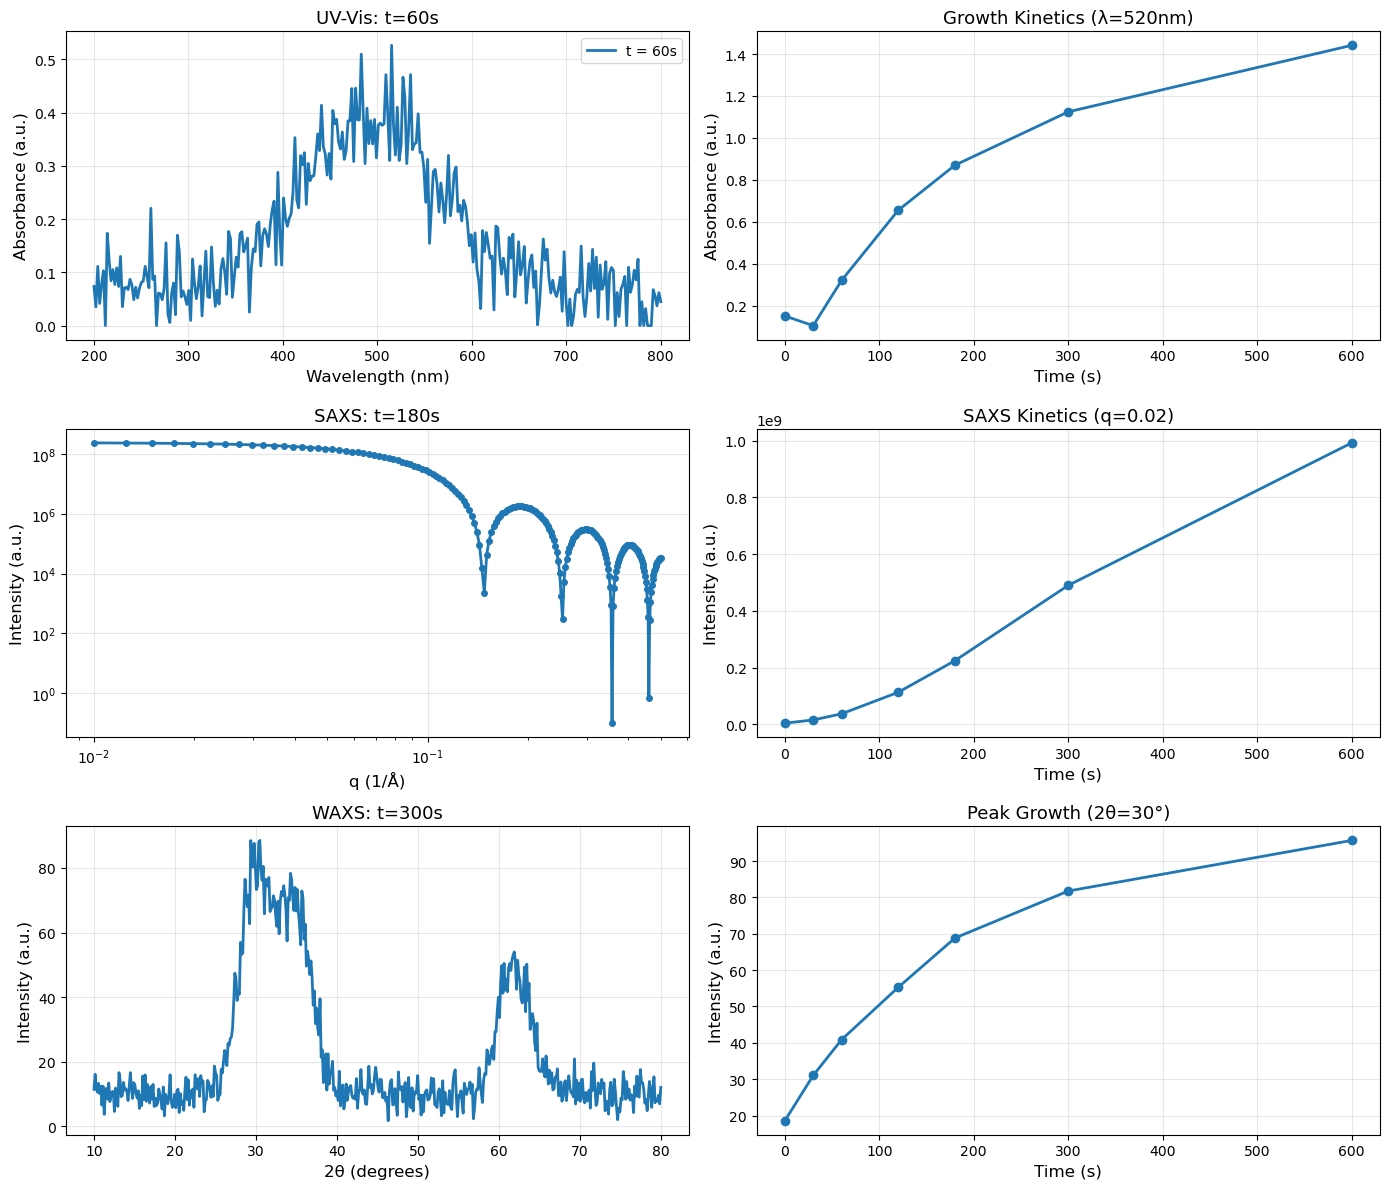

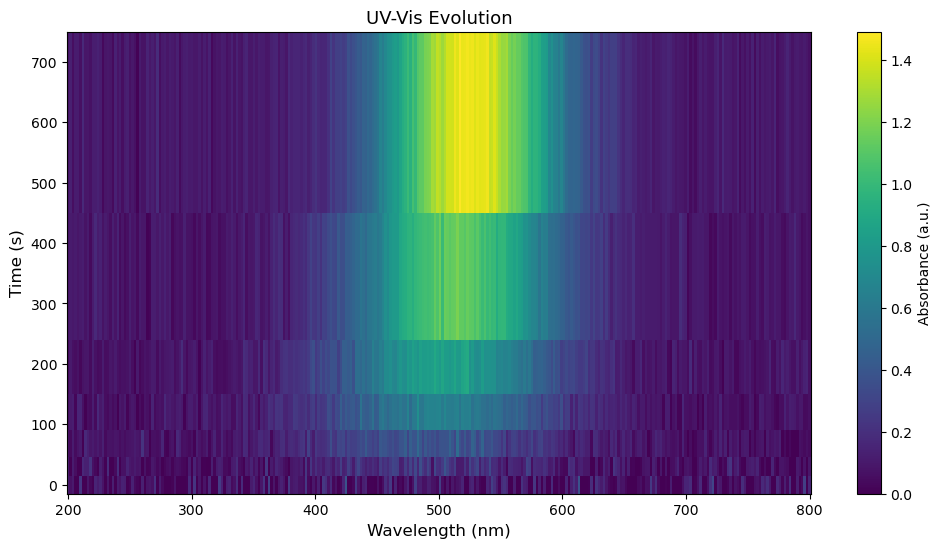

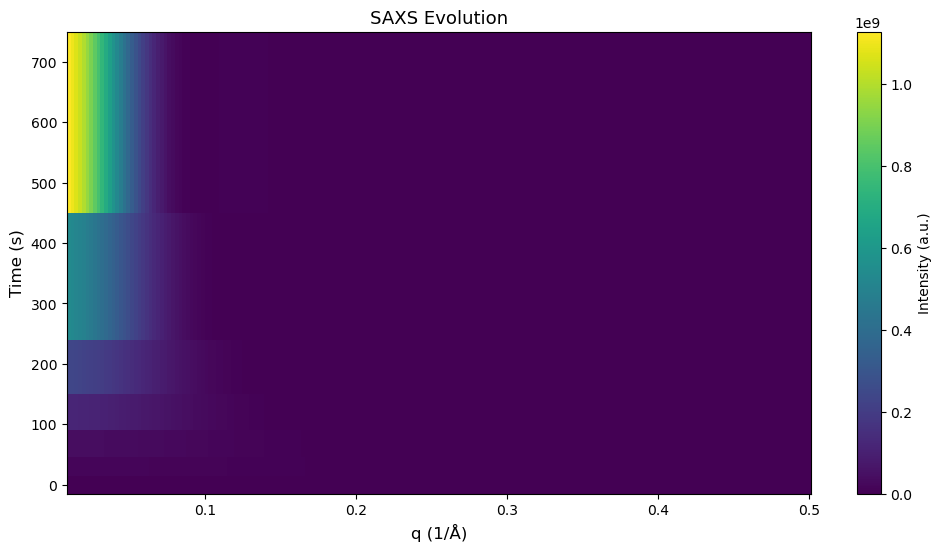

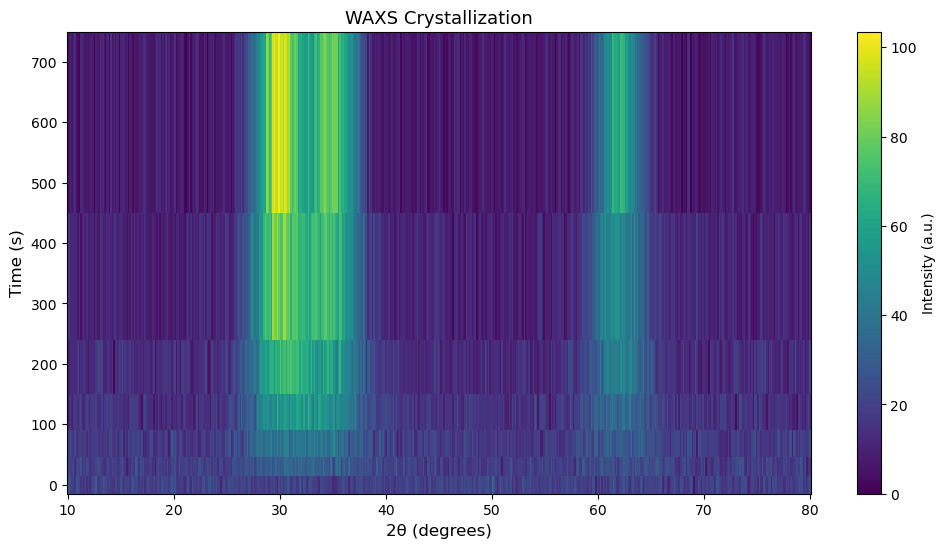

In [42]:
# ============================================================================
# STEP 9: Visualizations
# ============================================================================
print("\n10. Creating visualizations...")

try:
    import matplotlib.pyplot as plt
    
    plot_dir = project_dir / "analysis_plots"
    plot_dir.mkdir(exist_ok=True)
    
    # Multi-panel summary plot
    fig, axes = plt.subplots(3, 2, figsize=(14, 12))
    
    # Row 1: UV-Vis
    run.uvvis.plot(plot_type="spectrum", time_point=60, ax=axes[0, 0], 
                   title="UV-Vis: t=60s")
    run.uvvis.plot(plot_type="kinetics", wavelength=520, ax=axes[0, 1], 
                   title="Growth Kinetics (λ=520nm)")
    
    # Row 2: SAXS
    run.saxs.plot(plot_type="profile", time_point=180, loglog=True, ax=axes[1, 0],
                  title="SAXS: t=180s")
    run.saxs.plot(plot_type="kinetics", q_value=0.02, ax=axes[1, 1],
                  title="SAXS Kinetics (q=0.02)")
    
    # Row 3: WAXS
    run.waxs.plot(plot_type="pattern", time_point=300, ax=axes[2, 0],
                  title="WAXS: t=300s")
    run.waxs.plot(plot_type="kinetics", two_theta_value=30, ax=axes[2, 1],
                  title="Peak Growth (2θ=30°)")
    
    plt.tight_layout()
    summary_file = plot_dir / "growth_summary.png"
    plt.savefig(summary_file, dpi=150, bbox_inches='tight')
    #plt.close()
    print(f"   ✓ Saved: {summary_file}")
    
    # Individual heatmaps
    for data_type, title in [("uvvis", "UV-Vis Evolution"), 
                              ("saxs", "SAXS Evolution"), 
                              ("waxs", "WAXS Crystallization")]:
        fig, ax = plt.subplots(figsize=(12, 6))
        getattr(run, data_type).plot(plot_type="heatmap", ax=ax, title=title)
        filename = plot_dir / f"{data_type}_heatmap.png"
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        #plt.close()
        print(f"   ✓ Saved: {filename}")
    
except ImportError:
    print("   ⚠ matplotlib not available - skipping plots")

# THE END